# 보편성 증명

## 목차

1. [소개](#intro)
2. [행렬의 재미](#fun)<br> 2.1 [외적으로서의 행렬](#outer)<br> 2.2 [유니테리 및 에르미트 행렬](#u-and-h)<br> 2.3 [파울리 분해](#pauli)
3. [보편성 정의](#defining)
4. [기본 게이트 집합](#basic)<br> 4.1 [클리포드 게이트](#big-red)<br> 4.2 [클리포드가 아닌 게이트](#non-clifford)<br> 4.3 [게이트 집합 확장](#expanding)
5. [보편성 증명](#proving)
6. [범용 양자 게이트 집합](#gate-sets)

## 1. 소개 <a id="intro"></a>

What can any given computer do? What are the limits of what is deemed computable, in general? These were questions tackled by Alan Turing before we even had a good idea of what a computer was, or how to build one.

고전적인 컴퓨터, 특히 표준 디지털 컴퓨터에 대하여 이 질문을 하려면, 모든 화면, 스피커, 그리고 멋진 입력 장치를 제거해야 합니다. 남는 건 단지 입력 비트 문자열을 출력 비트 문자열로 변환하는 기계입니다. 장치가 임의의 입력 집합을 가져와 임의로 주어진 상응하는 출력 집합으로 변환하는 식의 이러한 변환을 수행할 수 있는 경우, 그것을 *범용적*이라고 합니다.

양자 컴퓨터도 유사하게 입력 상태를 취하여 그들을 출력 상태로 변환합니다. 따라서 유사한 방식으로 보편성을 정의할 수 있을 것입니다. 보다 정확하고 보편성을 달성할 수 있는 경우와 그렇지 못한 경우를 증명하려면, 양자 게이트의 행렬 표현을 사용하는 것이 유용합니다. 그러나 먼저 몇 가지 기술을 다듬어야 합니다.

## 2. 행렬의 재미 <a id="fun"></a>

### 2.1 외적으로서의 행렬 <a id="outer"></a>

이전 절에서는 $\langle0|0\rangle =1$ 와 같은 많은 내적 계산을 했습니다. 이들은 브라와 켓을 결합하여 하나의 숫자를 제공합니다. 또한, 그들을 단순히 반대 순서로 배치함으로써 행렬을 제공하도록 결합할 수도 있습니다. 이것을 외적이라고 하며, 표준 행렬 곱에 의해 작동합니다. 다음은 그 예시입니다.

$$ |0\rangle\langle0|= \begin{pmatrix} 1 \ 0 \end{pmatrix} \begin{pmatrix} 1 &amp; 0 \end{pmatrix} = \begin{pmatrix} 1&amp;0 \ 0&amp;0 \end{pmatrix},\ |0\rangle\langle1| = \begin{pmatrix} 1 \ 0 \end{pmatrix} \begin{pmatrix} 0 &amp; 1 \end{pmatrix} = \begin{pmatrix} 0&amp;1 \ 0&amp;0 \end{pmatrix},\ |1\rangle\langle0| = \begin{pmatrix} 0 \ 1 \end{pmatrix} \begin{pmatrix} 1 &amp; 0 \end{pmatrix} = \begin{pmatrix} 0&amp;0 \ 1&amp;0 \end{pmatrix},\ |1\rangle\langle1| = \begin{pmatrix} 0 \ 1 \end{pmatrix} \begin{pmatrix} 0 &amp; 1 \end{pmatrix} = \begin{pmatrix} 0&amp;0 \ 0&amp;1 \end{pmatrix}.\ $$

이것은 모든 행렬을 순전히 외적의 관점에서 작성할 수 있음을 의미합니다. 위의 예시에서는 단일 큐비트 행렬의 각 단일 원소를 커버하는 네 개의 행렬을 구성하였으며, 따라서 어떠한 단일 큐비트 행렬이든 이 관점에서 작성할 수 있습니다.

$$ M= \begin{pmatrix} m_{0,0}&amp; m_{0,1} \ m_{1,0}&amp;m_{1,1} \end{pmatrix} = m_{0,0} |0\rangle\langle0|+ m_{0,1} |0\rangle\langle1|+ m_{1,0} |1\rangle\langle0|+ m_{1,1} |1\rangle\langle1| $$

또한 이 속성은 임의의 큐비트 개수, $n$ 에 대한 행렬로 확장됩니다. 단순히 상응하는 $n$-비트 문자열의 외적을 사용합니다.

### 2.2 유니테리 및 에르미트 행렬 <a id="u-and-h"></a>

The Hermitian conjugate $M^\dagger$ of a matrix $M$ is the combination of the transpose (replace the bottom left element with the top right, and so on) and the complex conjugate of each element. Two families of matrices that are very important to quantum computing are defined by their relationship with the Hermitian conjugate. One is the family of unitary matrices, for which

$$ U = \sum_j \left| \phi_j \right\rangle \left\langle \psi_j \right|. $$

This means that the Hermitian conjugate of a unitary is its inverse: another unitary $U^\dagger$ with the power to undo the effects of $U$. All gates in quantum computing, with the exception of measurement and reset operations, can be represented by unitary matrices.

유니테리의 또 다른 결과는 두 임의의 상태 사이의 내적이 보존된다는 것입니다. $\left| \psi_0 \right\rangle$와 $\left| \psi_1 \right\rangle$로 두 상태를 특정지어 보겠습니다. 두 상태의 내적은 $\left\langle \psi_0 | \psi_1 \right\rangle$이 됩니다. 유니테리 $U$를 두 상태에 모두에 적용해도 두 상태의 내적은 정확히 동일합니다.

$$ H = H^\dagger. $$

이 속성은 이와 같은 게이트에 대해 매우 유용합니다. 시스템의 정규직교 기저인 모든 상태 집합 ${ \left| \psi_j \right\rangle }$ 에 대해 상태 집합 ${ \left| \phi_j \right\rangle = U \left| \psi_j \right\rangle }$ 도 정규직교 기저가 될 수 있습니다. 유니테리는 이러한 기저들 간의 회전으로 생각할 수 있으며, 다음과 같이 작성할 수 있습니다.

GL_FORMULA_2

이것은 본질적으로 고전 부울 게이트의 동작을 설명하는 '진리표'의 양자 버전입니다.

다른 중요한 행렬 그룹은 에르미트 행렬입니다. 이러한 행렬은 에르미트 켤레에 영향을 받지 않습니다.

GL_FORMULA_3

행렬 $X$, $Y$, $Z$, $H$ 는 이미 봤던 에르미트 행렬의 예입니다 (공교롭게도 이 행렬은 본인의 역이기 때문에 또한 모두 유니테리 입니다).

모든 유니테리 행렬과 에르미트 행렬은 대각화가 가능하다는 성질이 있습니다. 이는 다음과 같은 형태로 작성할 수 있음을 의미합니다.

$$ M = \sum_j \lambda_j |h_j\rangle\langle h_j| $$

여기서 $\lambda_j$ 는 행렬의 고유값이고 $|h_j\rangle$ 는 상응하는 고유상태입니다.

유니테리의 경우 이러한 대각화 형태에 $U U^\dagger=1$ 조건을 적용하면 $\lambda_j \lambda_j^* = 1$ 가 됩니다. 따라서 고윳값은 항상 크기가 1인 복소수이고 어떤 실수 값 $h_j$ 에 대해 $e^{ih_j}$ 로 표현할 수 있습니다. 에르미트 행렬의 경우 조건 $H = H^\dagger$ 은 $\lambda_j = \lambda_j^*$ 를 의미하므로 모든 고윳값은 실수입니다.

따라서 에르미트 행렬은 반드시 고윳값이 실수여야 하며, 유니테리 행렬은 반드시 실수의 복소 지수를 가져야 한다는 점에 차이가 있습니다. 이는 모든 유니테리에 대해 상응하는 에르미트 행렬을 정의할 수 있음을 의미합니다. 간단히 동일한 고유 상태를 재사용하고 상응하는 고윳값으로는 각 $e^{ih_j}$ 의 $h_j$ 를 사용합니다.

유사하게 각 에르미트 행렬에 상응하는 유니테리 행렬이 있습니다. 간단히 같은 고유 상태를 재사용하고 $h_j$ 를 지수화하여 고윳값 $e^{ih_j}$ 를 만듭니다. 다음과 같이 표현할 수 있습니다.

$$ U = e^{iH} $$

지금까지 행렬을 지수화하는 표준 정의를 사용했습니다. 이 행렬은 고유 상태를 보존하고 고윳값을 지수화하는 속성이 있습니다.

### 2.3 파울리 분해 <a id="pauli"></a>

위에서 보았듯이 행렬을 전적으로 외적의 관점에서 작성할 수 있습니다.

GL_FORMULA_8

이제 파울리 연산자의 관점에서 작성하는 것도 가능하다는 것을 알아보겠습니다. 이를 위해 주목해야 할 핵심은 다음과 같습니다.

GL_FORMULA_9

이것은 $|0\rangle\langle0|$ 와 $|1\rangle\langle1|$ 가 단위행렬과 $Z$를 사용하여 표현할 수 있음을 보여줍니다. 이제 $X|0\rangle = |1\rangle$ 라는 성질을 사용하여 다음을 생성할 수도 있습니다.

GL_FORMULA_10

모든 외적이 있으므로 이제 이것을 사용하여 파울리 행렬의 관점에서 행렬을 작성할 수 있습니다.

GL_FORMULA_11

이 예는 일반적인 단일 큐비트 행렬에 대한 것이지만, 해당 결과는 임의의 큐비트 수에 대한 행렬에 대해서도 성립합니다. 단순히 다음의 관측으로부터 시작하겠습니다.

GL_FORMULA_12

그런 다음 위와 같은 방식으로 진행할 수 있습니다. 결국 모든 행렬은 파울리 행렬의 텐서 곱으로 표현될 수 있음을 보일 수 있습니다.

GL_FORMULA_13

에르미트 행렬의 경우에는 $C_{P_{n-1}\ldots,P_0}$ 의 계수가 모두 실수입니다.

## 3. 보편성 정의 <a id="defining"></a>

각 양자 게이트를 유니테리로 표현할 수 있는 것처럼 전체 양자 계산 또한 (매우 큰) 유니테리 연산으로 설명할 수 있습니다. 유니테리 연산은 입력 상태를 회전시켜 출력 상태를 만듭니다.

한 가지 특별한 경우는 입력 및 출력 상태가 양자 형식으로 표현된 비트 문자열을 설명하는 경우입니다. 각 입력 $f(x)$ 를 출력 $f(x)$ 으로 매핑하는 것은 일부 (가역적인) 고전적인 계산으로 설명할 수 있습니다. 따라서 이러한 계산은 유니테리로 표현할 수 있습니다.

$$ U = \sum_j \left| f(x) \right\rangle \left\langle x \right|. $$

모든 가능한 유니테리를 구현할 수 있다면 표준 디지털 컴퓨터 측면에서 범용성을 달성할 수 있다는 의미가 됩니다.

다른 특별한 경우로는 입력 및 출력 상태는 물리 시스템을 설명할 수 있고, 수행하는 계산은 해당 시스템의 동역학을 시뮬레이션 한다는 것입니다. 이는 고전 컴퓨터에서는 비현실적이지만 양자 컴퓨터에서는 자연스러운 응용인 중요한 문제입니다. 이 경우 시스템의 시간 변화는 적용하려는 유니테리에 상응하고, 연관된 에르미트 행렬은 시스템의 해밀토니안입니다. 따라서 모든 유니테리를 달성하는 것은 모든 시간 변화를 시뮬레이션 하고 모든 헤밀토니안의 영향을 엔지니어링하는 것에 상응힙니다.

이러한 통찰을 결합하여 양자 컴퓨터의 범용성에 대한 의미를 정의할 수 있습니다. 이는 간단히 말해 임의의 큐비트의 수에 대해 원하는 모든 유니테리를 달성할 수 있는 능력입니다. 이 능력이 있다면 디지털 컴퓨터가 할 수 있는 모든 것을 재현할 수 있고, 모든 양자 시스템을 시뮬레이션할 수 있으며, 양자 컴퓨터에서 가능한 다른 모든 것을 할 수 있음을 알 수 있습니다.

## 4. 기본 게이트 집합 <a id="basic"></a>

기본 게이트로 모든 유니테리를 만들 수 있는지는 접근할 수 있는 기본 게이트에 따라 많이 다릅니다. 내결함성 양자 컴퓨터의 가능한 모든 실현을 위해 실현하기 가장 간단한 양자 연산 집합이 있습니다. 대부분 단일 및 2 큐비트 게이트로 구성되며, 대부분 *클리포드 게이트* 라고 하는 집합에 해당합니다. 이는 양자 알고리즘에서 많은 작업을 수행하는 매우 중요한 연산 집합입니다.

### 4.1 클리포드 게이트 <a id="big-red"></a>

To understand Clifford gates, let's start with an example that you have already seen many times: the Hadamard.

$$ H = |+\rangle\langle0|~+~ |-\rangle\langle1| = |0\rangle\langle+|~+~ |1\rangle\langle-|. $$

이 게이트는 외적을 사용해서 위와 같이 표현할 수 있습니다. 이 같은 형태로 표현할 때 유명한 효과를 분명히 알 수 있습니다. $|0\rangle$ 을 $|+\rangle$ 만큼 회전시킵니다. 좀 더 일반적으로 z 측정의 기저 상태 ${ |0\rangle,|1\rangle }$ 에서 x 측정의 기저 상태 ${ |+\rangle,|-\rangle }$ 로 회전한다고 할 수 있으며, 그 반대도 마찬가지입니다.

이러한 방식으로 하다마드의 효과는 정보를 큐비트 주변으로 이동시키는 것입니다. 이는 이전에 x 측정으로 접근한 정보를 z 측정으로 접근한 정보와 교환합니다.

하다마드는 다른 게이트와 결합하여 다른 연산을 수행할 수 있습니다. 다음은 그 예입니다.

$$ H X H = Z,\\ H Z H = X $$

$X$ 앞뒤로 하다마드를 적용하여 z 기저 상태에 적용한 연산을 x 기저 상태로 전달되도록 합니다. 결합 효과는 $Z$ 게이트의 효과와 동일합니다. 마찬가지로 하다마드와 $Z$ 게이트로 $X$를 만들 수 있습니다.

$S$ 게이트와 그 에르미트 켤레에 대해서도 유사한 연산을 확인할 수 있습니다.

$$ S X S^{\dagger} = Y,\\ S Y S^{\dagger} = -X,\\ S Z S^{\dagger} = Z $$

이는 $X$ 와 $Z$ 대신 $X$ 와 $Y$를 교환한다는 것을 제외하면 하다마드와 유사한 효과를 보입니다.  하다마드와 결합하여 y와 z 사이에 정보를 이동시키는 합성 게이트를 만들 수 있습니다.

파울리에서 다른 파울리로 변환하는 이러한 속성은 클리포드 게이트의 정의적 특징입니다. 단일 큐비트의 경우를 명시적으로 설명하겠습니다. $U$ 가 클리포드고 $P$ 가 파울리라면 $U P U^{\dagger}$ 또한 파울리 입니다. 하다마드와 같은 에르미트 게이트의 경우 간단히 $U P U$ 를 사용할 수 있습니다.

단일 큐비트 클리포드 게이트의 추가 예는 파울리 자체입니다. 그들이 작용하는 파울리를 변환하지 않습니다. 대신 $-1$ 의 위상을 반교환(anticommute)하는 2개에 할당합니다. 예를 들어 다음과 같습니다.

$$ Z X Z = -X,\\ Z Y Z = -Y,\\ Z Z Z= ~~~~Z $$

$S$ 게이트의 효과에서도 유사한 위상이 발생했음을 알 수 있습니다. 파울리와 결합함으로써 이 위상을 상쇄시키고 하다마드의 $X$와 $Z$ 교환과 유사한 방식으로 $X와 $Y$를 교환하는 합성 게이트를 만들 수 있습니다.

다중 큐비트 클리포드 게이트의 경우 정의적 성질은 파울리의 텐서 곱을 다른 파울리의 텐서 곱으로 변환한다는 것입니다. 예를 들어 가장 눈에 띄는 2 큐비트 클리포드 게이트는 CNOT 입니다. 이번 장에서 사용할 CNOT의 성질은 다음과 같습니다.

$$ { CX}<em data-md-type="emphasis">{j,k}~ (X \otimes 1)~{ CX}</em>{j,k} = X \otimes X $$

이는 효율적으로 $X$ 를 제어 큐비트에서 대상으로 '복사'합니다.

유니테리와 에르미트 켤레 사이에 행렬을 끼워 넣는 과정은 유니테리에 의한 켤레라고 합니다. 이 과정은 행렬의 고유상태를 변환하지만 고유값은 유지합니다. 클리포드에 의한 켤레가 파울리간 변환을 가능케하는 이유는 모든 파울리가 동일한 고유값의 집합을 공유하기 때문입니다.

### 4.2 클리포드가 아닌 게이트<a id="non-clifford"></a>

클리포드 게이트는 매우 중요하지만 그것만으로는 강력하지 않습니다. 따라서 양자 계산을 하려면 클리포드가 아닌 게이트가 필요합니다. 세 가지 중요한 예시로서 큐비트의 세 축을 중심으로 한 임의 회전 $R_x(\theta)$, $R_y(\theta)$ 및 $R_z(\theta)$ 이 있습니다.

그 중에서 $R_x(\theta)$ 에 집중해 봅시다. 위에서 보았듯이 어떤 유니테리도 에르미트 행렬을 사용하여 지수 형태로 표현할 수 있습니다. 이 게이트의 경우 우리는 다음과 같이 표현할 수 있음을 알 수 있습니다.

$$ R_x(\theta) = e^{i \frac{\theta}{2} X} $$

또한 우리는 이전 절을 통해 단일 행렬과 해당 에르미트 행렬이 동일한 고유 상태를 가지고 있다는 것을 알았습니다. 이 절에서, 우리는 유니테리에 의한 켤래가 고유 상태를 변환하고 고유 값을 변경하지 않은 채로 남기는 것을 보았습니다. 이것으로부터 우리는 다음의 결과를 확인할 수 있습니다.

$$ U R_x(\theta)U^\dagger = e^{i \frac{\theta}{2} ~U X U^\dagger} $$

By conjugating this rotation by a Clifford, we can therefore transform it to the same rotation around another axis. So even if we didn't have a direct way to perform $R_y(\theta)$ and $R_z(\theta)$, we could do it with $R_x(\theta)$ combined with Clifford gates. This technique of boosting the power of non-Clifford gates by combining them with Clifford gates is one that we make great use of in quantum computing.

### 4.3 게이트 집합 확장 <a id="expanding"></a>

$R_x(\theta)$를 클리포드와 결합하는 또 다른 예로서 CNOT과의 결합은 다음과 같습니다.

$$ CX_{j,k} ~(R_x(\theta) \otimes 1)~ CX_{j,k} = CX_{j,k} ~ e^{i \frac{\theta}{2} ~ (X\otimes 1)}~ CX_{j,k} = e^{i \frac{\theta}{2} ~CX_{j,k} ~ (X\otimes 1)~ CX_{j,k}} = e^{i \frac{\theta}{2} ~ X\otimes X} $$

이것은 단순한 단일 큐비트 회전을 훨씬 더 강력한 2큐비트 게이트로 변환합니다. 이것은 두 큐비트에서 독립적으로 동일한 회전을 수행하는 것과 동일하지 않습니다. 대신 얽힌 상태를 생성하고 조작할 수 있는 게이트입니다.

게다가 동일한 방법을 사용하여 이 작업을 큐비트 수에 관계없이  확장할 수 있습니다. 그러기 위해서 $X$를 새로운 큐비트에 계속 복사하는 CNOT 결합이 필요합니다.

또한 단일 큐비트 클리포드를 사용하여 다른 큐비트에서 파울리를 변환할 수 있습니다. 예를 들어 2큐비트 예제에서 오른쪽 큐비트에 $S$를 활용하여 $X$를 $Y$로 바꿀 수 있습니다.

$$ \left( I \otimes S \right)  ~e^{i \frac{\theta}{2} ~ X\otimes X}~\left( I \otimes S^\dagger \right) = e^{i \frac{\theta}{2} ~ X\otimes Y} $$

With these techniques, we can make complex entangling operations that act on any arbitrary number of qubits, of the form

$$ U = e^{i\frac{\theta}{2} ~ P_{n-1}\otimes P_{n-2}\otimes...\otimes P_0}, ~~~ P_j \in {I,X,Y,Z}. $$

이로 부터 x축을 중심으로 한 회전과 단일 및 2 큐비트 클리포드 게이트를 결합하면 매우 유용한 가능성(possibilities)이 있다는 것을 알 수 있습니다. 이 게이트 결합을 사용해서 무엇이든 할 수 있습니다.

## 5. 보편성 증명 <a id="proving"></a>

고전 컴퓨터의 경우 큰 작업을 관리 가능한 작은 작업들로 나눠야 합니다. 이를 위한 기본 게이트 집합을 찾아야 합니다. 차차 알게 되겠지만 이전 절에서 살펴본 단일 및 2 큐비트 게이트는 이러한 작업에 충분합니다.

다음과 같은 유니테리 구현을 가정해봅시다.

$$ U = e^{i(aX + bZ)} $$

게이트는 $R_x(\theta) = e^{i \frac{\theta}{2} X}$ 및 $R_z(\theta) = e^{i \frac{\theta}{2} Z}$ 만 사용할 수 있다고 합시다. 이 문제를 해결하기 위한 가장 좋은 방법은 오일러 각을 사용하는 것입니다. 하지만 다른 방법을 고려해 보겠습니다.

$U$ 의 지수에 있는 에르미트 행렬은 $R_x(\theta)$ 과 $R_z(\theta)$ 회전에 대한 단순 덧셈입니다. 이를 통해 가장 단순한 해결책을 제안할 수 있습니다. $R_z(2b) = e^{i bZ}$ 다음에 $R_x(2a) = e^{i a X}$ 를 적용할 수 있습니다. 안타깝게도 교환법칙이 성립 하지 않는 행렬을 지수화 했기 때문에 이러한 접근은 잘못되었습니다.

$$ e^{i a X} e^{i b Z} \neq e^{i(aX + bZ)} $$

하지만 다음과 같이 수정할 수 있습니다.

$$ U = \lim_{n\rightarrow\infty} ~ \left(e^{iaX/n}e^{ibZ/n}\right)^n $$

여기서 $U$ 을 $n$ 개의 작은 부분으로 나눴습니다. 각 부분은 다음과 같이 근사화 합니다.

$$ e^{iaX/n}e^{ibZ/n} = e^{i(aX + bZ)/n} $$

이 근사화 오차는 $1/n^2$ 로 축소됩니다. $n$ 개의 부분을 결합할 때 대상 유니테리의 근사화 오차는 $1/n$ 이 됩니다. 따라서 단순히 부분의 갯수 $n$을 늘림으로써 필요한 만큼 $U$ 에 가까워질 수 있습니다. 시퀀스를 생성하는 다른 방법으로 좀 더 정확한 대상 유니테리를 구할 수도 있습니다.

이 방법의 장점은 단일 큐비트보다 복잡한 경우에도 사용할 수 있다는 것입니다. 다음 유니테리를 예로 들어 보겠습니다.

$$ U = e^{i(aX\otimes X\otimes X + bZ\otimes Z\otimes Z)} $$

단일 큐비트 $R_x(\theta)$ 와 2 개의 제어 반전 게이트로 유니테리 $e^{i\frac{\theta}{2} X\otimes X\otimes X}$ 를 만드는 법을 알고 있습니다.

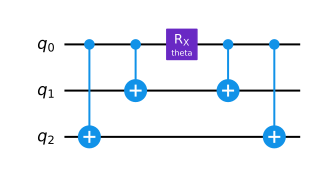

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
theta = Parameter('theta')

qc = QuantumCircuit(3)
qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

몇 개의 하다마드 게이트를 사용하여 $e^{i\frac{\theta}{2} Z\otimes Z\otimes Z}$ 에 대해서도 동일한 작업을 할 수 있습니다.

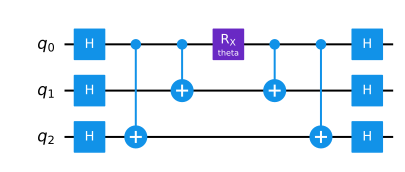

In [2]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.h(1)
qc.h(0)
qc.draw()

이를 통해 새로운 3-큐비트 $U$ 의 작은 일부분을 재현할 수 있습니다.

$$ e^{iaX\otimes X\otimes X/n}e^{ibZ\otimes Z\otimes Z/n} = e^{i(aX\otimes X\otimes X + bZ\otimes Z\otimes Z)/n} $$

이전과 마찬가지로 부분을 결합하여 임의의 정확한 $U$ 근사를 얻을 수 있습니다.

이 방법은 큐비트 수와 시뮬레이션에 필요한 항의 수를 늘려도 유효합니다. 근사 정확도가 유지되도록 주의를 기울여야 하지만 적절한 리소스를 할당하는 방식으로 수행할 수 있습니다. 추가 항을 시뮬레이션에 더하거나 원하는 정확도를 높이면 다항 시간으로 복잡성이 증가합니다.

이러한 형태의 방법은  파울리 게이트의 텐서 곱의 합 형태로 표현할 수 있는 $H$에 대하여 모든 유니테리 $U = e^{iH}$ 를 재현할 수 있습니다. 전에 모든 행렬이 이러한 방식으로 표현될 수 있음을 보였으므로 이로써 모든 유니테리를 재현할 수 있음을 보이기에 충분합니다. 실제로 더 좋은 방법이 있을지 모르지만 이번 장에서 강조할 주요 개념은 Qiskit에 있는 기본 연산으로만 모든 다중 큐비트 유니테리를 재현할 수 있는 확실한 방법이 있다는 것입니다. 양자 보편성은 달성할 수 있습니다!

이 게이트 집합으로만 보편성을 달성할 수 있는 것은 아닙니다. 예를 들어 하다마드와 토폴리 만으로도 충분히 보편성을 달성할 수 있음을 보일 수 있습니다. 여러 게이트 집합 또한 내결함성 게이트를 달성을 위한 다른 경로로 자극되어 고려되었고 보편성이 입증되었습니다.

이번 장에서 논의한 모든 것은 계산 회로 모델을 따르지만 이것이 양자 계산의 유일한 보편적 모델은 아닙니다. 단열 양자 계산 또는 측정 기반 양자 계산과 같은 다른 형태의 양자 계산이 있습니다. 그것이 보편적이라는 사실은 다항 시간의 회로 모델에서 다른 계산 모델로의 리소스가 있음이 입증되었음을 의미합니다. 이러한 다른 모델은 종종 계산을 수행하기 위해 양자 역학적 속성을 활용합니다. 이러한 다른 형태의 양자 계산이 있지만 각각의 이점은 물리적 및 하드웨어적 문제와만 관련 있다는 것에 유의하는 것이 중요합니다. 양자 컴퓨터의 보편적인 모델은 모든 양자 알고리즘을 수행할 수 있기 때문에 회로 모델만 고수하면 되며 논의를 위해 다른 보편적 모델은 무시할 수 있습니다.

보편적이지 않지만 특정 응용에 적용할 수 있는 다른 형태의 양자 계산이 있습니다. 예를 들어 양자 어닐링은 최적화와 샘플링 문제에 유용할 수 있습니다. 어닐링은 금속을 고온으로 가열한 다음 천천히 냉각시키는 과정입니다. 이 과정은 용융 금속이 금속 조각의 표면 위로 흐르고 자체적으로 재분배되도록 하여 금속의 많은 성질을 변화시킵니다. 양자 어닐링은 몇몇 관점에서 어닐링의 물리적 과정과 유사합니다. 이는 문제를 일종의 에너지 경관(energy landscape)으로 부호화한 다음 양자 상태가 에너지 경관을 탐색하도록 하는 것을 포함합니다. 정상파는 주변보다 낮은 골(국부 최소값)에 갇힐 수 있지만, 양자 효과는 양자 상태가 에너지 경관에서 가장 낮은 지점(전역 최소값)을 빠르게 찾을 수 있도록 합니다.

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table